In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

import statsmodels.api as sm

In [49]:
synthetic = pd.read_csv("Assigned_Pop\\assigned_pop.csv")

In [50]:
area_code = pd.read_csv("Data\\area_codes.csv")

In [51]:
synthetic = synthetic.dropna()
synthetic

,SA1_CODE21,INC,TOTALVEHS,HHSIZE,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,owndwell_Something Else,int_evs,house_id,score,assign_ev
0,20302104732,350.0,1.0,3.0,0,0,1,0,1,0,0,0,0,0.0,1,-0.101160,0.0
1,20302104732,3600.0,0.0,2.0,0,0,1,0,0,0,1,0,0,0.0,2,-0.239749,0.0
2,20302104732,1900.0,1.0,2.0,0,0,1,0,0,0,1,0,0,0.0,3,-0.152698,0.0
3,20302104732,350.0,3.0,3.0,0,0,1,0,0,0,1,0,0,0.0,4,-0.087372,0.0
4,20302104732,800.0,2.0,2.0,0,0,1,0,1,0,0,0,0,0.0,5,-0.061961,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901068,21402159223,1750.0,0.0,1.0,1,0,0,0,1,0,0,0,0,1.0,1901069,0.021787,0.0
1901069,21402159223,2850.0,1.0,1.0,0,1,0,0,0,0,1,0,0,1.0,1901070,0.055612,0.0
1901070,21402159223,3200.0,2.0,1.0,0,0,1,0,0,0,1,0,0,1.0,1901071,0.187360,0.0
1901071,21402159223,2800.0,1.0,1.0,0,0,1,0,1,0,0,0,0,1.0,1901072,0.363705,0.0


In [53]:
synthetic = synthetic.merge(area_code[["SA1_CODE21", "POA_CODE21"]], on="SA1_CODE21", how="left")

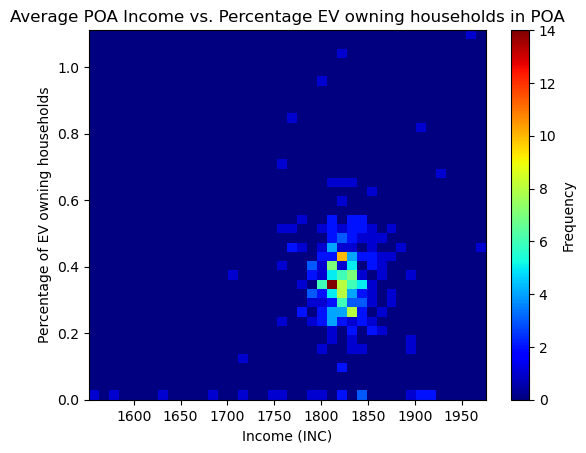

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named synthetic
# Replace "synthetic" with your actual DataFrame name

# Group the data by "POA_CODE21" and calculate the mean for each group
grouped_data = synthetic[["POA_CODE21", "INC", "assign_ev"]].groupby("POA_CODE21").mean()

# Extract the "INC" and "assign_ev" columns from the grouped data
income = grouped_data["INC"]
assigned_events = grouped_data["assign_ev"] * 100

# Create a histogram with higher resolution (increased number of bins)
plt.hist2d(
    income,
    assigned_events,
    bins=(40, 40),  # Increase the number of bins for higher resolution
    cmap=plt.cm.jet,
)
plt.colorbar(label='Frequency')
plt.xlabel('Income (INC)')
plt.ylabel('Percentage of EV owning households')
plt.title('Average POA Income vs. Percentage EV owning households in POA')
plt.show()


In [69]:
high_inc = synthetic[synthetic["INC"] > synthetic["INC"].quantile(0.9)]

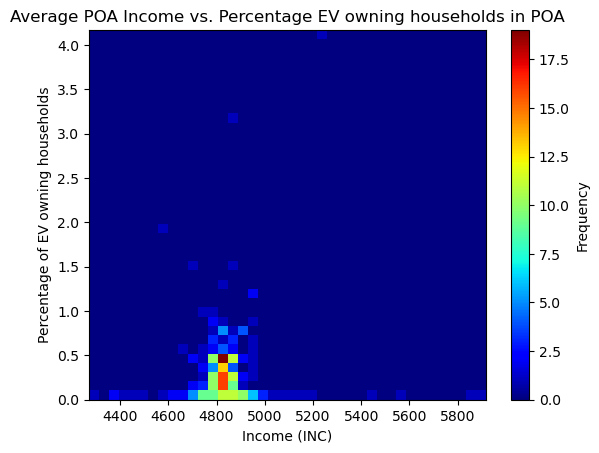

In [70]:
# Assuming you have a DataFrame named synthetic
# Replace "synthetic" with your actual DataFrame name

# Group the data by "POA_CODE21" and calculate the mean for each group
grouped_data = high_inc[["POA_CODE21", "INC", "assign_ev"]].groupby("POA_CODE21").mean()

# Extract the "INC" and "assign_ev" columns from the grouped data
income = grouped_data["INC"]
assigned_events = grouped_data["assign_ev"] * 100

# Create a histogram with higher resolution (increased number of bins)
plt.hist2d(
    income,
    assigned_events,
    bins=(40, 40),  # Increase the number of bins for higher resolution
    cmap=plt.cm.jet,
)
plt.colorbar(label='Frequency')
plt.xlabel('Income (INC)')
plt.ylabel('Percentage of EV owning households')
plt.title('Average POA Income vs. Percentage EV owning households in POA')
plt.show()

In [55]:
X =  synthetic[[
    'INC'
]]

y = synthetic['assign_ev']

# Add a constant to the features (intercept)
X = sm.add_constant(X)

# Fit a logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Get the summary of the model
summary = result.summary()

# Print the summary
print(summary)

Optimization terminated successfully.
         Current function value: 0.023822
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              assign_ev   No. Observations:              1856124
Model:                          Logit   Df Residuals:                  1856122
Method:                           MLE   Df Model:                            1
Date:                Thu, 14 Sep 2023   Pseudo R-squ.:               1.842e-05
Time:                        18:44:56   Log-Likelihood:                -44217.
converged:                       True   LL-Null:                       -44218.
Covariance Type:            nonrobust   LLR p-value:                    0.2018
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6038      0.020   -275.462      0.000      -5.644      -5.564
INC        -1.145e-05   9.01

In [25]:
# X = synthetic[[
#     'INC', 'TOTALVEHS', 'HHSIZE', 'dwelltype_Flat or Apartment',
#     'dwelltype_Other', 'dwelltype_Separate House', 'dwelltype_Terrace/Townhouse',
#     'owndwell_Being Purchased', 'owndwell_Being Rented', 'owndwell_Fully Owned',
#     'owndwell_Occupied Rent-Free', 'owndwell_Something Else', 
# ]]

X =  synthetic[[
    'INC', 'TOTALVEHS'
]]

y = synthetic['assign_ev']

# Add a constant to the features (intercept)
X = sm.add_constant(X)

# Fit a logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Get the summary of the model
summary = result.summary()

# Print the summary
print(summary)

Optimization terminated successfully.
         Current function value: 0.023511
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              assign_ev   No. Observations:              1856124
Model:                          Logit   Df Residuals:                  1856121
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Sep 2023   Pseudo R-squ.:                 0.01308
Time:                        18:19:52   Log-Likelihood:                -43640.
converged:                       True   LL-Null:                       -44218.
Covariance Type:            nonrobust   LLR p-value:                8.181e-252
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2782      0.029   -215.356      0.000      -6.335      -6.221
INC         -1.11e-05   9.01

In [33]:
ev_pop = synthetic[synthetic["assign_ev"] == 1]
non_ev_pop = synthetic[synthetic["assign_ev"] == 0]

In [72]:
ev_pop.mean()

SA1_CODE21                     2.097113e+10
INC                            1.802252e+03
TOTALVEHS                      2.161097e+00
HHSIZE                         3.799940e+00
dwelltype_Flat or Apartment    8.631800e-02
dwelltype_Other                4.166042e-02
dwelltype_Separate House       7.872022e-01
dwelltype_Terrace/Townhouse    8.481942e-02
owndwell_Being Purchased       4.199011e-01
owndwell_Being Rented          2.532594e-01
owndwell_Fully Owned           3.148509e-01
owndwell_Occupied Rent-Free    9.141316e-03
owndwell_Something Else        2.847295e-03
int_evs                        1.577851e+00
house_id                       9.667909e+05
score                          5.272550e-01
assign_ev                      1.000000e+00
dtype: float64

In [43]:
synthetic.groupby("SA1_CODE21").mean()

,INC,TOTALVEHS,HHSIZE,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,owndwell_Something Else,int_evs,house_id,score,assign_ev
SA1_CODE21,,,,,,,,,,,,,,,,
20301103507,1759.808081,2.040404,3.222222,0.131313,0.040404,0.737374,0.090909,0.353535,0.323232,0.313131,0.000000,0.010101,0.0,3590.0,0.090565,0.000000
20301103607,1690.407643,1.974522,3.044586,0.159236,0.031847,0.681529,0.127389,0.324841,0.280255,0.382166,0.006369,0.006369,0.0,6052.0,0.056416,0.000000
20301103608,2119.439024,1.817073,2.975610,0.146341,0.073171,0.670732,0.109756,0.292683,0.243902,0.439024,0.024390,0.000000,0.0,6171.5,0.077662,0.000000
20301103609,1592.613208,1.754717,2.867925,0.169811,0.018868,0.716981,0.094340,0.424528,0.273585,0.292453,0.009434,0.000000,0.0,6265.5,0.087118,0.000000
20302103701,1875.830409,1.654971,2.625731,0.163743,0.070175,0.660819,0.105263,0.339181,0.269006,0.362573,0.017544,0.011696,0.0,7591.0,0.068801,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21402159219,1928.112676,1.436620,2.042254,0.197183,0.065728,0.652582,0.084507,0.248826,0.286385,0.455399,0.009390,0.000000,0.0,1899963.0,0.018450,0.000000
21402159220,1759.552448,1.486014,2.174825,0.153846,0.052448,0.688811,0.104895,0.283217,0.283217,0.409091,0.020979,0.003497,0.0,1900212.5,0.031070,0.000000
21402159221,1664.255814,1.293023,1.725581,0.144186,0.079070,0.674419,0.102326,0.283721,0.218605,0.474419,0.004651,0.018605,2.0,1900463.0,-0.002781,0.009302


In [37]:
print(ev_pop["INC"].mean(), non_ev_pop["INC"].mean())
print(ev_pop["TOTALVEHS"].mean(), non_ev_pop["TOTALVEHS"].mean())
print(ev_pop["HHSIZE"].mean(), non_ev_pop["HHSIZE"].mean())
print(ev_pop["dwelltype_Separate House"].mean(), non_ev_pop["dwelltype_Separate House"].mean())
print(ev_pop["owndwell_Fully Owned"].mean(), non_ev_pop["owndwell_Fully Owned"].mean())


1802.2520605424847 1823.726688622732
2.1610969578900043 1.6992983323159143
3.799940056945901 2.653000809429393
0.7872021579499475 0.7018455747137935
0.31485089165292973 0.4085455629805818


(2.1610969578900043, 1.6992983323159143)

In [5]:
pop = pd.read_csv("Data\population.csv")

In [9]:
pop.groupby("SA1_CODE21").sum()

,POA_CODE21,SA2_CODE21,SA3_CODE21,SA4_CODE21,LGA_CODE21,INC,TOTALVEHS,HHSIZE,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,owndwell_Something Else
SA1_CODE21,,,,,,,,,,,,,,,,,
20301103507,329769,20098092465,2009799,20097,2226510,174221.0,202.0,319.0,13,4,73,9,35,32,31,0,1
20301103607,505069,31872732652,3187257,31871,4158930,265394.0,310.0,478.0,25,5,107,20,51,44,60,1,1
20301103608,265680,16646904952,1664682,16646,2172180,173794.0,149.0,244.0,12,6,55,9,24,20,36,2,0
20301103609,343440,21519169816,2151906,21518,2807940,168817.0,186.0,304.0,18,2,76,10,45,29,31,1,0
20302103701,549936,34716597327,3471642,34713,3890250,320767.0,283.0,449.0,28,12,113,18,58,46,62,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21402159219,837303,45586599096,4558626,45582,5397420,410688.0,306.0,435.0,42,14,139,18,53,61,97,2,0
21402159220,1124266,61210175312,6120972,61204,7247240,503232.0,425.0,622.0,44,15,197,30,81,81,117,6,1
21402159221,845165,46014642280,4601430,46010,5448100,357815.0,278.0,371.0,31,17,145,22,61,47,102,1,4


In [81]:
sa1_to_poa = gpd.read_file("Shape\sa1_to_poa.gpkg")
sa1_to_lga = gpd.read_file("Shape\sa1_to_lga.gpkg")
poa_selected = gpd.read_file("Shape\poa_selected.gpkg")
sa1_poa = sa1_to_poa[["SA1_CODE21", "POA_CODE21"]]
sa1_lga = sa1_to_lga[["SA1_CODE21", "LGA_CODE21"]]

In [64]:
synthetic = pd.read_csv("Data\clean1.1_data.csv")
synthetic["SA1"] = synthetic["SA1"].astype(str)
synthetic = synthetic.merge(sa1_poa, left_on="SA1", right_on="SA1_CODE21", how="left")
synthetic = synthetic.merge(sa1_lga, on="SA1_CODE21", how="left")
synthetic = synthetic.drop(columns="SA1").dropna()
desired_column_order = ['SA1_CODE21', 'POA_CODE21', 'LGA_CODE21']

# Reorder the columns
synthetic = synthetic[desired_column_order + [col for col in synthetic.columns if col not in desired_column_order]]

C:\Users\danla\AppData\Local\Temp\ipykernel_4668\265056147.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sa1_pop = synthetic.groupby("SA1_CODE21").mean().reset_index()


<Axes: >

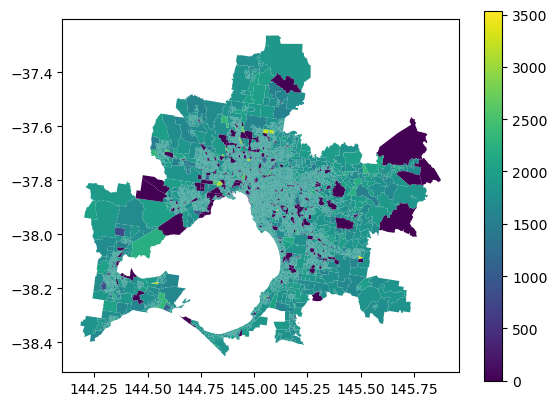

In [118]:
sa1_pop = synthetic.groupby("SA1_CODE21").mean().reset_index()
sa1_pop = sa1_to_poa.merge(sa1_pop, on="SA1_CODE21", how="left")
sa1_pop.fillna(0, inplace=True)
sa1_pop.plot(column="INC", cmap='viridis', legend=True)

C:\Users\danla\AppData\Local\Temp\ipykernel_4668\36792447.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  poa_pop = synthetic.groupby("POA_CODE21").mean().reset_index()


<Axes: >

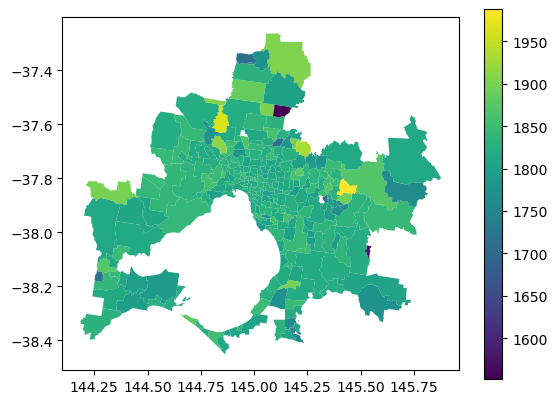

In [123]:
poa_pop = synthetic.groupby("POA_CODE21").mean().reset_index()
poa_pop = poa_selected.merge(poa_pop, on="POA_CODE21", how="left").dropna()
poa_pop.fillna(0, inplace=True)
poa_pop.plot(column="INC", legend=True)

C:\Users\danla\AppData\Local\Temp\ipykernel_4668\1358960227.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  poa_high_inc_pop = high_inc_synthetic.groupby("POA_CODE21").mean().reset_index()


<Axes: >

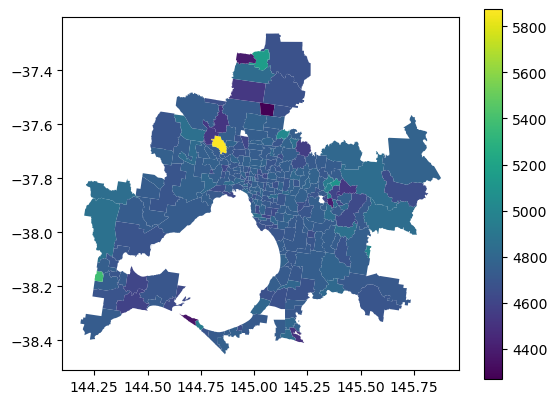

In [131]:
top_10_percent_quantile = synthetic["INC"].quantile(0.90)
high_inc_synthetic = synthetic[synthetic["INC"] >= top_10_percent_quantile]

poa_high_inc_pop = high_inc_synthetic.groupby("POA_CODE21").mean().reset_index()
poa_high_inc_pop = poa_selected.merge(poa_high_inc_pop, on="POA_CODE21", how="left").dropna()
poa_high_inc_pop.fillna(0, inplace=True)
poa_high_inc_pop.plot(column="INC", legend=True)

In [24]:
unique_sa1_values = unclean_data["SA1"].unique()
list_SA1 = pd.DataFrame(unique_sa1_values, columns=["SA1_CODE21"])

<Axes: >

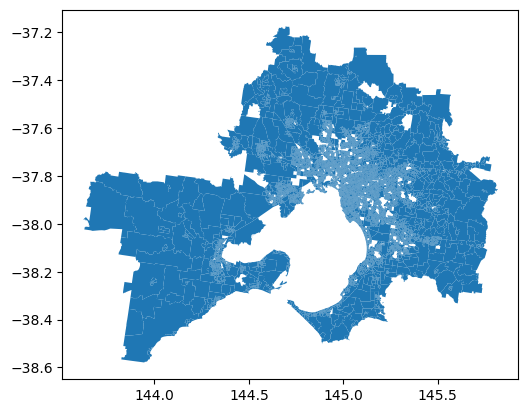

In [25]:
list_SA1["SA1_CODE21"] = list_SA1["SA1_CODE21"].astype(str)
sa1_all.merge(list_SA1, on="SA1_CODE21", how="right").plot()

In [5]:
poa = gpd.read_file("Shape\poa_selected.gpkg")
sa1 = gpd.read_file("Shape\sa1_to_poa.gpkg")

In [7]:
synthetic = pd.read_csv("Data\clean1.1_data.csv")
synthetic

,SA1,INC,TOTALVEHS,HHSIZE,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,owndwell_Something Else
0,20301103401,3625.0,2.0,6.0,0,0,1,0,1,0,0,0,0
1,20301103401,1825.0,1.0,7.0,0,0,1,0,1,0,0,0,0
2,20301103401,1375.0,2.0,7.0,0,0,0,1,1,0,0,0,0
3,20301103401,100.0,2.0,7.0,0,0,1,0,1,0,0,0,0
4,20301103401,900.0,3.0,7.0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900681,21402159223,2850.0,1.0,1.0,0,1,0,0,0,0,1,0,0
1900682,21402159223,3200.0,2.0,1.0,0,0,1,0,0,0,1,0,0
1900683,21402159223,2800.0,1.0,1.0,0,0,1,0,1,0,0,0,0
1900684,21402159223,3000.0,0.0,1.0,1,0,0,0,0,1,0,0,0


In [24]:
synthetic["SA1"] = synthetic["SA1"].astype(str)
population = synthetic.merge(sa1, left_on="SA1", right_on="SA1_CODE21", how="inner")

In [41]:
population["INC"].mean()

1823.6554690757919

In [30]:
population.groupby("POA_CODE21").mean().reset_index()

C:\Users\danla\AppData\Local\Temp\ipykernel_1392\1898125820.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  population.groupby("POA_CODE21").mean().reset_index()


,POA_CODE21,INC,TOTALVEHS,HHSIZE,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,owndwell_Something Else,AREASQKM21,AREASQKM
0,3000,1814.528982,1.328798,1.689726,0.180648,0.060492,0.648724,0.110136,0.253091,0.265778,0.466697,0.009377,0.005056,0.023453,7100.1467
1,3002,1808.181106,1.377013,1.820636,0.168916,0.057031,0.669569,0.104484,0.251633,0.266434,0.466260,0.012190,0.003483,0.068005,7100.1467
2,3003,1837.671863,1.424786,1.893998,0.179008,0.055339,0.654456,0.111198,0.261367,0.275396,0.449208,0.009613,0.004417,0.053207,7100.1467
3,3004,1812.527989,1.349638,1.725057,0.189122,0.063571,0.641709,0.105598,0.247042,0.275826,0.460357,0.009359,0.007417,0.055001,7100.1467
4,3006,1817.163203,1.370515,1.755789,0.174909,0.060735,0.656459,0.107897,0.251166,0.265841,0.465604,0.010518,0.006871,0.022511,7100.1467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,3977,1819.402856,1.891172,3.180892,0.124544,0.043918,0.733317,0.098221,0.347641,0.253287,0.386118,0.008397,0.004558,0.567972,7100.1467
277,3978,1821.142159,1.944771,3.366206,0.117562,0.042625,0.740585,0.099228,0.371782,0.247269,0.369490,0.007181,0.004278,0.934982,7100.1467
278,3980,1823.928811,1.809045,2.886935,0.144054,0.041876,0.726131,0.087940,0.338358,0.260469,0.391122,0.008375,0.001675,3.646238,7100.1467
279,3981,1805.930295,1.746917,2.824129,0.145308,0.048257,0.693298,0.113137,0.314745,0.268097,0.401609,0.009651,0.005898,11.953318,7100.1467


In [52]:
evs = pd.read_csv("Data\poa_ev.csv")
evs["POA_CODE21"] = evs["POA_CODE21"].astype(str)
ev_pop = evs.merge(poa, on="POA_CODE21", how="left")

In [51]:
ev_pop["TOTAL1"].sum()

6560.0

In [61]:
evs.merge(population, on="POA_CODE21", how="left")["TOTAL1"].sum()

55965797.0

In [62]:
evs

,POA_CODE21,TOTAL1
0,3000,62.0
1,3002,29.0
2,3003,25.0
3,3004,26.0
4,3006,33.0
...,...,...
301,3230,13.0
302,3240,8.0
303,3331,11.0
304,3340,28.0


## Model